In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer, Normalizer
import statsmodels.api as sm
%matplotlib inline

##Load data

In [3]:
num_prev_blocks = 50

In [4]:
df = pd.read_csv('./../data/data_filtered.csv')

In [5]:
df_avg = pd.read_csv('./../data/block_avg_{}.csv'.format(num_prev_blocks))

##Merge data

In [6]:
df.columns

Index([u'Unnamed: 0', u'hash_t', u'accountNonce', u'amount', u'block_id',
       u'gasLimit_t', u'gasUsed_t', u'newContract', u'price', u'time_t',
       u'txIndex', u'type', u'blockTime', u'difficulty', u'gasLimit_b',
       u'gasUsed_b', u'reward', u'size', u'time_b', u'totalFee', u'tx_count',
       u'uncle_count', u'amount_binary', u'price_gwei', u'day', u'hour',
       u'minute', u'second', u'dayofweek', u'amount_eth', u'type_enc',
       u'txcnt_second', u'avg_gasUsed_t_perblock', u'avg_price_perblock'],
      dtype='object')

In [7]:
df_avg.columns

Index([u'Unnamed: 0', u'avg_blocktime', u'avg_gasUsed_b', u'avg_tx_count',
       u'avg_uncle_count', u'avg_difficulty', u'avg_txcnt_second',
       u'avg_gasUsed_t', u'avg_price', u'blockids'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_avg.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df_avg.shape

(14473, 9)

In [11]:
df.shape[1] + df_avg.shape[1]

42

In [12]:
df_avg.head()

,avg_blocktime,avg_gasUsed_b,avg_tx_count,avg_uncle_count,avg_difficulty,avg_txcnt_second,avg_gasUsed_t,avg_price,blockids
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286251
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286252
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286253
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286254
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4286255


In [13]:
merged = pd.merge(df, df_avg, left_on='block_id', right_on='blockids')

In [14]:
merged.columns

Index([u'hash_t', u'accountNonce', u'amount', u'block_id', u'gasLimit_t',
       u'gasUsed_t', u'newContract', u'price', u'time_t', u'txIndex', u'type',
       u'blockTime', u'difficulty', u'gasLimit_b', u'gasUsed_b', u'reward',
       u'size', u'time_b', u'totalFee', u'tx_count', u'uncle_count',
       u'amount_binary', u'price_gwei', u'day', u'hour', u'minute', u'second',
       u'dayofweek', u'amount_eth', u'type_enc', u'txcnt_second',
       u'avg_gasUsed_t_perblock', u'avg_price_perblock', u'avg_blocktime',
       u'avg_gasUsed_b', u'avg_tx_count', u'avg_uncle_count',
       u'avg_difficulty', u'avg_txcnt_second', u'avg_gasUsed_t', u'avg_price',
       u'blockids'],
      dtype='object')

In [15]:
merged.shape

(631783, 42)

In [16]:
#find null values
for col in merged.columns:
    print(col, merged[col].isnull().sum())

('hash_t', 0)
('accountNonce', 0)
('amount', 0)
('block_id', 0)
('gasLimit_t', 0)
('gasUsed_t', 0)
('newContract', 0)
('price', 0)
('time_t', 0)
('txIndex', 535592)
('type', 0)
('blockTime', 0)
('difficulty', 0)
('gasLimit_b', 0)
('gasUsed_b', 0)
('reward', 0)
('size', 0)
('time_b', 0)
('totalFee', 0)
('tx_count', 0)
('uncle_count', 0)
('amount_binary', 0)
('price_gwei', 0)
('day', 0)
('hour', 0)
('minute', 0)
('second', 0)
('dayofweek', 0)
('amount_eth', 0)
('type_enc', 0)
('txcnt_second', 0)
('avg_gasUsed_t_perblock', 0)
('avg_price_perblock', 0)
('avg_blocktime', 4592)
('avg_gasUsed_b', 4592)
('avg_tx_count', 4592)
('avg_uncle_count', 4592)
('avg_difficulty', 4592)
('avg_txcnt_second', 4592)
('avg_gasUsed_t', 4592)
('avg_price', 4592)
('blockids', 0)


In [17]:
merged.drop('txIndex', axis=1, inplace=True)

In [18]:
merged.dropna(inplace=True)

In [19]:
#find null values
for col in merged.columns:
    print(col, merged[col].isnull().sum())

('hash_t', 0)
('accountNonce', 0)
('amount', 0)
('block_id', 0)
('gasLimit_t', 0)
('gasUsed_t', 0)
('newContract', 0)
('price', 0)
('time_t', 0)
('type', 0)
('blockTime', 0)
('difficulty', 0)
('gasLimit_b', 0)
('gasUsed_b', 0)
('reward', 0)
('size', 0)
('time_b', 0)
('totalFee', 0)
('tx_count', 0)
('uncle_count', 0)
('amount_binary', 0)
('price_gwei', 0)
('day', 0)
('hour', 0)
('minute', 0)
('second', 0)
('dayofweek', 0)
('amount_eth', 0)
('type_enc', 0)
('txcnt_second', 0)
('avg_gasUsed_t_perblock', 0)
('avg_price_perblock', 0)
('avg_blocktime', 0)
('avg_gasUsed_b', 0)
('avg_tx_count', 0)
('avg_uncle_count', 0)
('avg_difficulty', 0)
('avg_txcnt_second', 0)
('avg_gasUsed_t', 0)
('avg_price', 0)
('blockids', 0)


(0, 100)

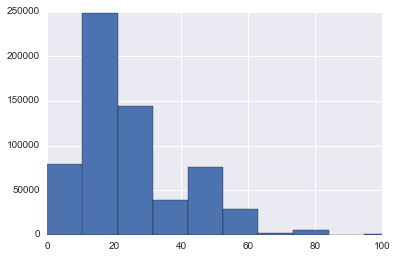

In [26]:
merged['price_gwei'].hist(bins=2000)
plt.xlim(0,100)

In [27]:
np.log(merged['price_gwei'].values)

array([ 3.04452244,  3.04452244,  3.04452244, ...,  3.04452244,
        3.04452244,  3.40119738])

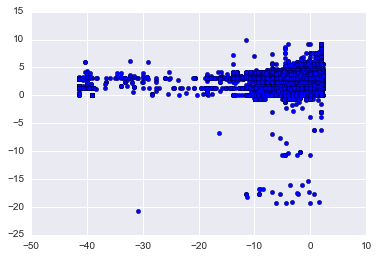

In [30]:
plt.scatter(np.log(merged['amount_eth'].values), np.log(merged['price_gwei'].values))

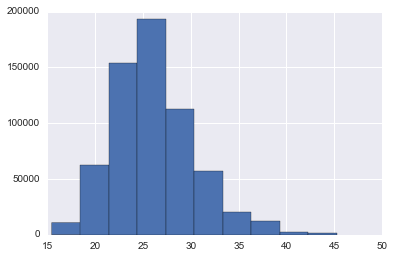

In [85]:
merged['avg_blocktime'].hist()

(0, 100)

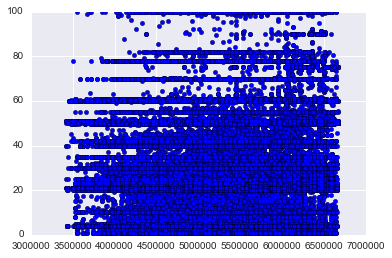

In [91]:
plt.scatter(merged['avg_gasUsed_b'], merged['price_gwei'])
plt.ylim(0,100)

#Select features for modeling

In [43]:
features = [
        'newContract',
        'day',
        'hour',
        'dayofweek',
        'amount_eth',
        'type_enc',
        'avg_price',
        'avg_blocktime',
        'avg_gasUsed_b',
        'avg_tx_count',
        'avg_uncle_count',
        'avg_difficulty',
        'avg_txcnt_second',
        'avg_gasUsed_t'
        ]
X = merged[features].values
y = merged['price_gwei'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

###Scale data

In [52]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

In [79]:
normalizer = Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train) 
normalizer = Normalizer().fit(X_test)
X_test_norm = normalizer.transform(X_test) 

##Linear regression

In [80]:
def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return lr

In [82]:
linear_regression(X_train, X_test, y_train, y_test)

MSE: 6681.39373938
R2_score: 0.0118809658286
avg_CV_score: 0.0112199915807


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
# get summary statistics from statsmodels
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     923.2
Date:                Fri, 29 Sep 2017   Prob (F-statistic):               0.00
Time:                        11:56:47   Log-Likelihood:            -2.7616e+06
No. Observations:              470393   AIC:                         5.523e+06
Df Residuals:                  470388   BIC:                         5.523e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           1.27e+09   1.25e+08     10.153      0.000    1.03e+09    1.52e+09
x2          2.224e+13   6.96e+12      3.195      0.001     8.6e+12    3.59e+13
x3          1.594e+13   4.82e+13      0.330      0.741   -7.86e+13     1.1e+14
x4         -4.866e+13   4.11e+12    -11.844      0.000   -5.67e+13   -4.06e+13
x5          8.285e+13   2.32e+12     35.666      0.000    7.83e+13    8.74e+13
x6          2.064e+13    1.1e+12     18.736      0.000    1.85e+13    2.28e+13
x7          2.081e+15   3.72e+13     55.999      0.000    2.01e+15    2.15e+15
x8          5.998e+13   7.92e+13      0.757      0.449   -9.53e+13    2.15e+14
x9         -6.621e+09   5.77e+08    -11.464      0.000   -7.75e+09   -5.49e+09
x10         4.523e+13   1.69e+13      2.674      0.007    1.21e+13    7.84e+13
x11          2.82e+11   7.77e+10      3.630      0.000     1.3e+11    4.34e+11
const         16.9763      0.936     18.141      0.000      15.142      18.811
x12        -1.355e+14   3.52e+13     -3.853      0.000   -2.04e+14   -6.66e+13
x13        -6.024e+10   2.09e+10     -2.887      0.004   -1.01e+11   -1.93e+10
==============================================================================
Omnibus:                  1901521.417   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    4572076343265.103
Skew:                         105.932   Prob(JB):                         0.00
Kurtosis:                   15274.797   Cond. No.                     8.56e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
for num, col in enumerate(merged[features].columns):
    print(num+1, col)

(1, 'newContract')
(2, 'day')
(3, 'hour')
(4, 'dayofweek')
(5, 'amount_eth')
(6, 'type_enc')
(7, 'avg_price')
(8, 'avg_blocktime')
(9, 'avg_gasUsed_b')
(10, 'avg_tx_count')
(11, 'avg_uncle_count')
(12, 'avg_difficulty')
(13, 'avg_txcnt_second')
(14, 'avg_gasUsed_t')


###Plot the avg MSE with respect to the number of blocks used

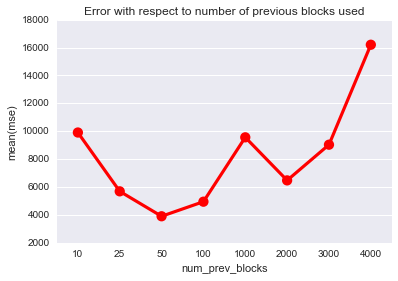

In [302]:
mse=[9906, 5689.59, 3902.42, 4946.9, 9560.67, 6474.36, 9032.47, 16197.49]
num_prev = [10, 25, 50, 100, 1000, 2000, 3000, 4000]
results = pd.DataFrame({'num_prev_blocks': num_prev, 'mse': mse})
sns.pointplot(x="num_prev_blocks", y="mse", data=results, color='r')
plt.title('Error with respect to number of previous blocks used')

The MSE seems to be minimal when using 50 previous blocks

In [323]:
from sklearn.naive_bayes import GaussianNB

In [324]:
gnb = GaussianNB()

In [325]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

ValueError: Unknown label type: (array([  4.00000000e-09,   5.00000000e-09,   1.20000000e-08, ...,
         1.00000000e+04,   1.00010000e+04,   2.10000000e+04]),)

##KNN regression

In [359]:
def knn_regressor(X_train, X_test, y_train, y_test):
    model = KNeighborsRegressor(n_neighbors=5, metric='cosine', weights='uniform')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('CV score: {} | MSE: {} | R^2: {}'.format(np.mean(cross_val_score(model, X_train, y_train)), 
                                                    mean_squared_error(y_test, y_pred), 
                                                    r2_score(y_test, y_pred)))

In [ ]:
knn_regressor(X_train, X_test, y_train, y_test)

##Random forest regressor

In [305]:
def rf_regressor(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)
    print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
    print('R2_score: {}'.format(r2_score(y_test, y_pred)))
    print('avg_CV_score: {}'.format(np.mean(scores)))
    return rf

In [306]:
model = rf_regressor(X_train, X_test, y_train, y_test)

MSE: 4983.90094258
R2_score: 0.195149541928
avg_CV_score: -0.0423348531275


In [309]:
def plot_feature_importance(rf, feature_df):
    cols = []
    for col in feature_df.columns:
        cols.append(col)

    feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=cols)
    feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
    feat_scores.plot(kind='barh', color='r', figsize=(6,6))
    plt.xlabel('Importance', fontsize=18)
    plt.title('Feature Importance', fontsize=18)
    plt.savefig('feat_import_50.png')

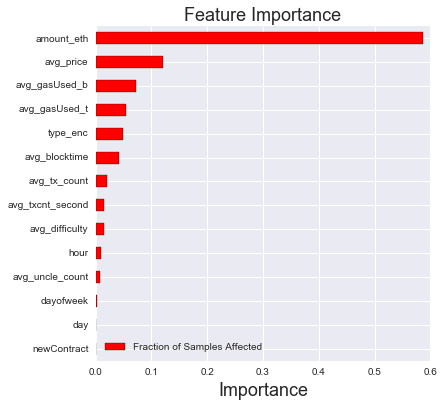

In [310]:
plot_feature_importance(model, merged[features])